# QT Analysis: Participant 3

In [3]:
# Load packages
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import (train_test_split, GridSearchCV, cross_val_score)
from sklearn.metrics import (classification_report, ConfusionMatrixDisplay)
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [4]:
import pandas as pd

# Create empty lists to store the data
sad_data = []
anger_data = []
fear_data = []
neutral_data = []

# Add the data together
for x in range(1, 5):
    df_sad = pd.read_csv("Data/Session{}/3/sad.csv".format(x))
    df_anger = pd.read_csv("Data/Session{}/3/anger.csv".format(x))
    df_fear = pd.read_csv("Data/Session{}/3/fear.csv".format(x))
    sad_data.append(df_sad)
    anger_data.append(df_anger)
    fear_data.append(df_fear)
    if x == 3 or x == 4:
        df_neutral = pd.read_csv("Data/Session{}/3/neutral.csv".format(x))
        neutral_data.append(df_neutral)

In [2]:
# Make sure lables are correct
for x in sad_data:
    x.iloc[:, 0] = "sad"
    
for x in anger_data:
    x.iloc[:, 0] = "anger"
    
for x in fear_data:
    x.iloc[:, 0] = "scared"
    
for x in neutral_data:
    x.iloc[:, 0] = "neutral"

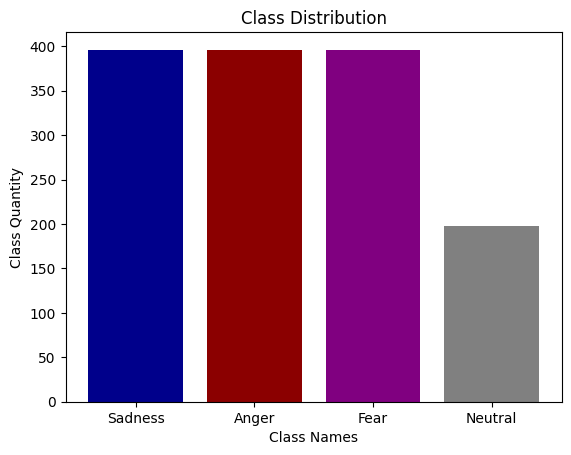

In [3]:
import matplotlib.pyplot as plt

# Creating a bar plot to show class distribution
classes = ["Sadness", "Anger", "Fear", "Neutral"]
num_classes = [(len(sad_data[0])) * (len(sad_data)), (len(anger_data[0])) * (len(anger_data)), (len(fear_data[0])) * (len(fear_data)), (len(neutral_data[0])) * (len(neutral_data))]
colors = ["darkblue", "darkred", "purple", "grey"]

plt.bar(classes, num_classes, color=colors)
plt.xlabel("Class Names")
plt.ylabel("Class Quantity")
plt.title("Class Distribution")
plt.show()

In [4]:
# Copy the neutral data so that it will be equal to the other classes
combined_data = sad_data + anger_data + fear_data + neutral_data
all_data = []

for x in combined_data:
    for y in range(len(x.values)):
        all_data.append(x.values[y])

In [5]:
import numpy as np

y = []
X = []
for data in all_data:
    # Extract labels and append to y
    label = data[0]
    y.append(label)
    # Extract feature points and append to X
    data2 = data[1:]
    # Normalize data between 0 and 1
    normalized = (data2 - np.min(data2)) / (np.max(data2) - np.min(data2))
    X.append(normalized)

In [6]:
# Encode the labels
df = pd.DataFrame({"col": y})
df["col_numeric"] = pd.factorize(df["col"])[0]
y = df["col_numeric"].values.tolist()

print(df)

          col  col_numeric
0         sad            0
1         sad            0
2         sad            0
3         sad            0
4         sad            0
...       ...          ...
1381  neutral            3
1382  neutral            3
1383  neutral            3
1384  neutral            3
1385  neutral            3

[1386 rows x 2 columns]


In [170]:
from joblib import dump, load

# Save data to save time
dump(X, "X_data.joblib")
dump(y, "y_data.joblib")

In [1]:
from joblib import dump, load

# Load data
X = load("X_data.joblib")
y = load("y_data.joblib")

In [7]:
import numpy as np

# Make sure all values in the arrays are float to prevent future warnings
X = [np.array(x, dtype=float) for x in X]

In [8]:
import numpy as np
from sklearn.model_selection import train_test_split

# Train test split of 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [9]:
# Use smote to fix imbalances
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

In [10]:
# Check if each class is equally represented in y_train
count0 = 0
count1 = 0
count2 = 0
count3 = 0

for x in y_train:
    if x == 0:
        count0 += 1
    elif x == 1:
        count1 += 1
    elif x == 2:
        count2 += 1
    elif x == 3:
        count3 += 1

print(f"Label 0: {count0}")
print(f"Label 1: {count1}")
print(f"Label 2: {count2}")
print(f"Label 3: {count3}")

Label 0: 317
Label 1: 317
Label 2: 317
Label 3: 317


### Logistic Regression

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

param_grid = {"solver": ["lbfgs", "liblinear", "newton-cg"]}

lr = LogisticRegression(random_state=42, max_iter=5000)
grid_search_lr = GridSearchCV(lr, param_grid, cv=5, n_jobs=-1)
grid_search_lr.fit(X_train, y_train)
print(grid_search_lr.best_params_)

{'solver': 'liblinear'}


In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

lr = LogisticRegression(random_state=42, max_iter=5000, solver="liblinear")
cv_scores = cross_val_score(lr, X_train, y_train, cv=5)
lr = lr.fit(X_train, y_train)

print("Cross-validation scores:", cv_scores)
print("Mean accuracy:", np.mean(cv_scores))
print("Test set accuracy:", lr.score(X_test, y_test))

y_pred = lr.predict(X_test).astype(int)

target_names = ["sad", "anger", "fear", "neutral"]
print(classification_report(y_test, y_pred, target_names=target_names))

Cross-validation scores: [0.79133858 0.80708661 0.84251969 0.7944664  0.76284585]
Mean accuracy: 0.7996514269708381
Test set accuracy: 0.7949640287769785
              precision    recall  f1-score   support

         sad       0.94      0.56      0.70        79
       anger       0.81      0.77      0.79        79
        fear       0.66      0.95      0.78        80
     neutral       1.00      1.00      1.00        40

    accuracy                           0.79       278
   macro avg       0.85      0.82      0.82       278
weighted avg       0.83      0.79      0.79       278



Confusion matrix, without normalization
[[44 12 23  0]
 [ 1 61 17  0]
 [ 2  2 76  0]
 [ 0  0  0 40]]
Normalized confusion matrix
[[0.55696203 0.15189873 0.29113924 0.        ]
 [0.01265823 0.7721519  0.21518987 0.        ]
 [0.025      0.025      0.95       0.        ]
 [0.         0.         0.         1.        ]]


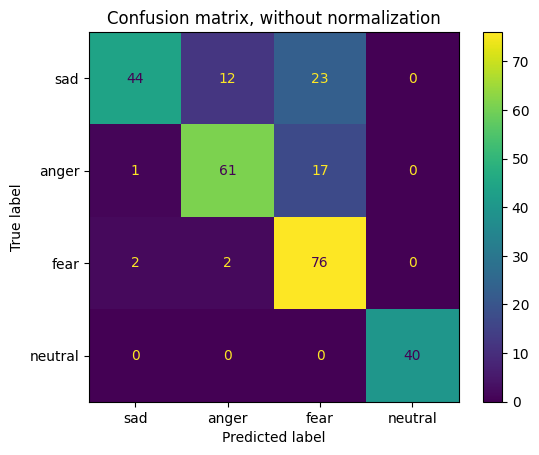

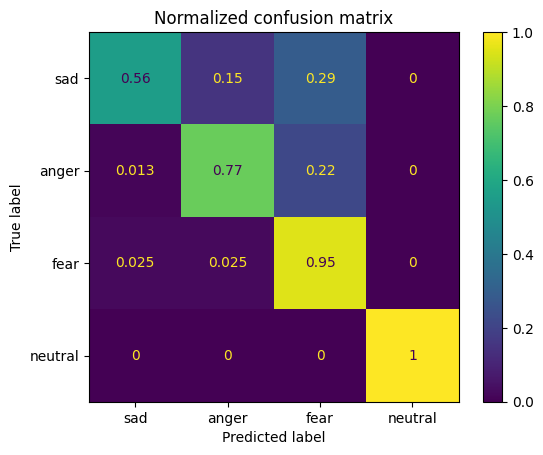

In [30]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn import datasets, svm
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

# Plot normalized and non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None), ("Normalized confusion matrix", "true")]

for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        lr,
        X_test,
        y_test,
        display_labels=target_names,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

### Random Forest

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {"n_estimators": [50, 100, 200, 300] }

rf = RandomForestClassifier(random_state=42)
grid_search_rf = GridSearchCV(rf, param_grid, cv=5, n_jobs=-1)
grid_search_rf.fit(X_train, y_train)
print(grid_search_rf.best_params_)

{'n_estimators': 200}


In [23]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

rf = RandomForestClassifier(random_state=42, n_estimators=200)
cv_scores = cross_val_score(rf, X_train, y_train, cv=5)
rf = rf.fit(X_train, y_train)

print("Cross-validation scores:", cv_scores)
print("Mean accuracy:", np.mean(cv_scores))
print("Test set accuracy:", rf.score(X_test, y_test))

y_pred = rf.predict(X_test).astype(int)

target_names = ["sad", "anger", "fear", "neutral"]
print(classification_report(y_test, y_pred, target_names=target_names))

Cross-validation scores: [0.97637795 0.98031496 0.98425197 0.98814229 0.98418972]
Mean accuracy: 0.982655379540008
Test set accuracy: 0.9928057553956835
              precision    recall  f1-score   support

         sad       0.99      1.00      0.99        79
       anger       1.00      0.97      0.99        79
        fear       0.99      1.00      0.99        80
     neutral       1.00      1.00      1.00        40

    accuracy                           0.99       278
   macro avg       0.99      0.99      0.99       278
weighted avg       0.99      0.99      0.99       278



Confusion matrix, without normalization
[[79  0  0  0]
 [ 1 77  1  0]
 [ 0  0 80  0]
 [ 0  0  0 40]]
Normalized confusion matrix
[[1.         0.         0.         0.        ]
 [0.01265823 0.97468354 0.01265823 0.        ]
 [0.         0.         1.         0.        ]
 [0.         0.         0.         1.        ]]


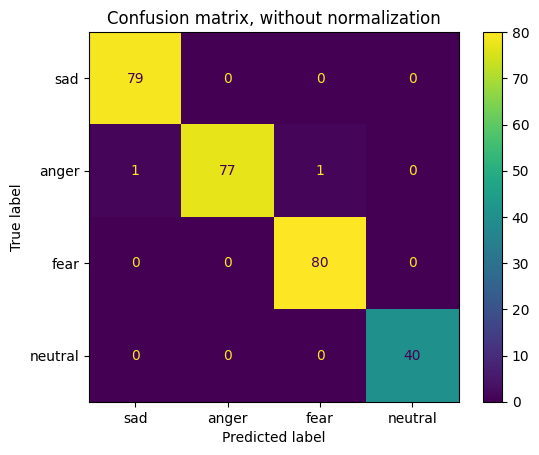

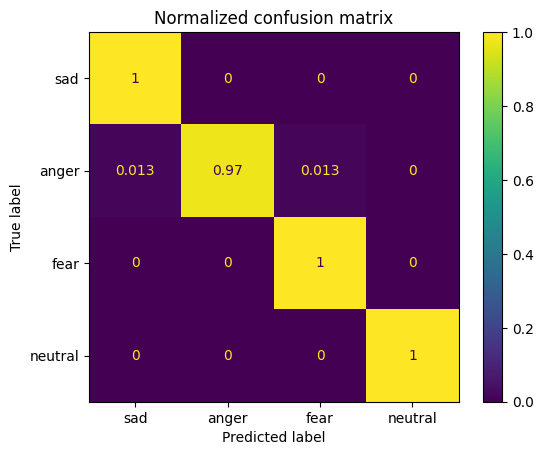

In [29]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn import datasets, svm
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

# Plot normalized and non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None), ("Normalized confusion matrix", "true")]

for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        rf,
        X_test,
        y_test,
        display_labels=target_names,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

### Multi-layer perceptron 

In [17]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {"hidden_layer_sizes": [(5,2)],
              "alpha": [0.0001, 0.001, 0.01],
              "learning_rate": ["constant", "adaptive"]}

mlp = MLPClassifier(random_state=42, max_iter=500000)
grid_search_mlp = GridSearchCV(mlp, param_grid, cv=5, n_jobs=-1)
grid_search_mlp.fit(X_train, y_train)
print(grid_search_mlp.best_params_)

{'alpha': 0.0001, 'hidden_layer_sizes': (5, 2), 'learning_rate': 'constant'}


In [31]:
# Multi-layer perceptron 
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

mlp = MLPClassifier(random_state=42, solver="lbfgs", alpha=0.0001, hidden_layer_sizes=(5,2), max_iter=50000)
cv_scores = cross_val_score(mlp, X_train, y_train, cv=5)
mlp = mlp.fit(X_train, y_train)

print("Cross-validation scores:", cv_scores)
print("Mean accuracy:", np.mean(cv_scores))
print("Test set accuracy:", mlp.score(X_test, y_test))

y_pred = mlp.predict(X_test).astype(int)

target_names = ["sad", "anger", "fear", "neutral"]
print(classification_report(y_test, y_pred, target_names=target_names))

Cross-validation scores: [0.84645669 0.62598425 0.69291339 0.55731225 0.81818182]
Mean accuracy: 0.7081696803709814
Test set accuracy: 0.7086330935251799
              precision    recall  f1-score   support

         sad       0.57      0.35      0.44        79
       anger       0.60      0.70      0.64        79
        fear       0.77      0.93      0.84        80
     neutral       0.98      1.00      0.99        40

    accuracy                           0.71       278
   macro avg       0.73      0.74      0.73       278
weighted avg       0.69      0.71      0.69       278



Confusion matrix, without normalization
[[28 35 15  1]
 [17 55  7  0]
 [ 4  2 74  0]
 [ 0  0  0 40]]
Normalized confusion matrix
[[0.35443038 0.44303797 0.18987342 0.01265823]
 [0.21518987 0.69620253 0.08860759 0.        ]
 [0.05       0.025      0.925      0.        ]
 [0.         0.         0.         1.        ]]


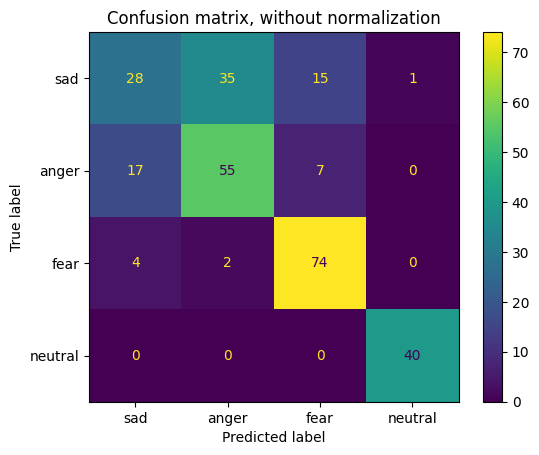

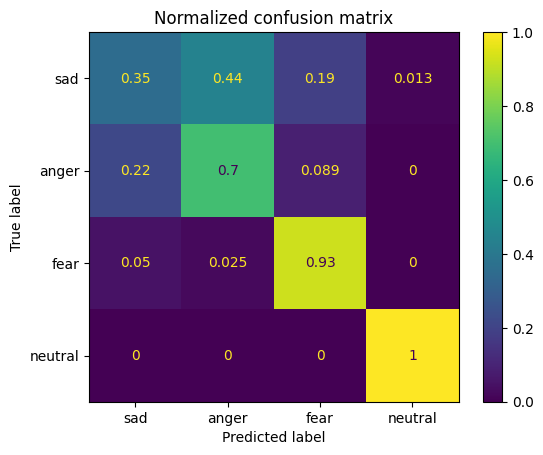

In [32]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn import datasets, svm
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

# Plot normalized and non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None), ("Normalized confusion matrix", "true")]

for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        mlp,
        X_test,
        y_test,
        display_labels=target_names,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

### Support Vector Machine

In [20]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

param_grid = {"svc__C": [0.1, 1, 10],
              "svc__kernel": ["linear", "rbf"],
              "svc__gamma": ["scale", "auto"]}

svm = make_pipeline(StandardScaler(), SVC(random_state=42))
grid_search_svm = GridSearchCV(svm, param_grid, cv=5, n_jobs=-1)
grid_search_svm.fit(X_train, y_train)
print(grid_search_svm.best_params_)

{'svc__C': 10, 'svc__gamma': 'scale', 'svc__kernel': 'rbf'}


In [26]:
# Support Vector Machine
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

svm = make_pipeline(StandardScaler(), SVC(random_state=42, gamma="scale", C=10, kernel="rbf"))
cv_scores = cross_val_score(svm, X_train, y_train, cv=5)
svm = svm.fit(X_train, y_train)

print("Cross-validation scores:", cv_scores)
print("Mean accuracy:", np.mean(cv_scores))
print("Test set accuracy:", svm.score(X_test, y_test))

y_pred = svm.predict(X_test).astype(int)

target_names = ["sad", "anger", "fear", "neutral"]
print(classification_report(y_test, y_pred, target_names=target_names))

Cross-validation scores: [0.97244094 0.98818898 0.99212598 0.98814229 0.99209486]
Mean accuracy: 0.9865986119324017
Test set accuracy: 0.9892086330935251
              precision    recall  f1-score   support

         sad       0.99      1.00      0.99        79
       anger       0.99      0.97      0.98        79
        fear       0.99      0.99      0.99        80
     neutral       1.00      1.00      1.00        40

    accuracy                           0.99       278
   macro avg       0.99      0.99      0.99       278
weighted avg       0.99      0.99      0.99       278



Confusion matrix, without normalization
[[79  0  0  0]
 [ 1 77  1  0]
 [ 0  1 79  0]
 [ 0  0  0 40]]
Normalized confusion matrix
[[1.         0.         0.         0.        ]
 [0.01265823 0.97468354 0.01265823 0.        ]
 [0.         0.0125     0.9875     0.        ]
 [0.         0.         0.         1.        ]]


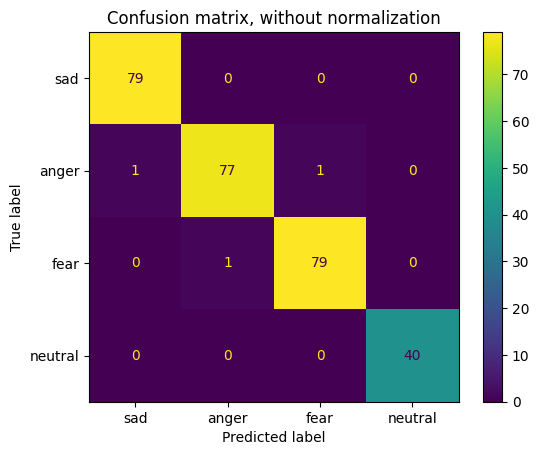

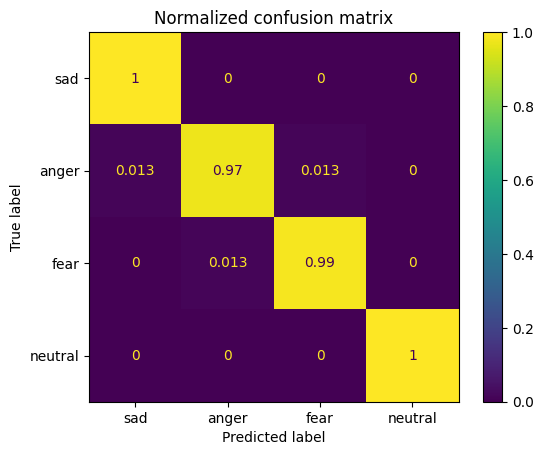

In [27]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.metrics import ConfusionMatrixDisplay

# Plot normalized and non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),("Normalized confusion matrix", "true")]

for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        svm,
        X_test,
        y_test,
        display_labels=target_names,
        normalize=normalize,
    )
    disp.ax_.set_title(title)
    print(title)
    print(disp.confusion_matrix)

plt.show()

## Data preparation with session 4 as a test set

In [5]:
# Create empty lists to store the data
sad_data13 = []
anger_data13 = []
fear_data13 = []
neutral_data13 = []

# Add the data together
for x in range(1, 4):
    df_sad13 = pd.read_csv("Data/Session{}/3/sad.csv".format(x))
    df_anger13 = pd.read_csv("Data/Session{}/3/anger.csv".format(x))
    df_fear13 = pd.read_csv("Data/Session{}/3/fear.csv".format(x))
    sad_data13.append(df_sad13)
    anger_data13.append(df_anger13)
    fear_data13.append(df_fear13)
    if x == 3:
        df_neutral13 = pd.read_csv("Data/Session{}/3/neutral.csv".format(x))
        neutral_data13.append(df_neutral13)
        
# Create empty lists for session to store the data for test set
sad_data4 = []
anger_data4 = []
fear_data4 = []
neutral_data4 = []

df_sad4 = pd.read_csv("Data/Session4/3/sad.csv")
df_anger4 = pd.read_csv("Data/Session4/3/anger.csv")
df_fear4 = pd.read_csv("Data/Session4/3/fear.csv")
df_neutral4 = pd.read_csv("Data/Session4/3/neutral.csv")
sad_data4.append(df_sad4)
anger_data4.append(df_anger4)
fear_data4.append(df_fear4)
neutral_data4.append(df_neutral4)

In [6]:
# Encode labels
for x in sad_data13:
    x.iloc[:, 0] = 0
    
for x in anger_data13:
    x.iloc[:, 0] = 1
    
for x in fear_data13:
    x.iloc[:, 0] = 2
    
for x in neutral_data13:
    x.iloc[:, 0] = 3
    
    # Encode labels
for x in sad_data4:
    x.iloc[:, 0] = 0
    
for x in anger_data4:
    x.iloc[:, 0] = 1
    
for x in fear_data4:
    x.iloc[:, 0] = 2
    
for x in neutral_data4:
    x.iloc[:, 0] = 3

In [7]:
# Copy the neutral data so that it will be equal to the other classes
combined_data13 = sad_data13 + anger_data13 + fear_data13 + neutral_data13
all_data13 = []

for x in combined_data13:
    for y in range(len(x.values)):
        all_data13.append(x.values[y])
        
# Copy the neutral data so that it will be equal to the other classes
combined_data4 = sad_data4 + anger_data4 + fear_data4 + neutral_data4
all_data4 = []

for x in combined_data4:
    for y in range(len(x.values)):
        all_data4.append(x.values[y])

In [8]:
# Shuffle data
random.seed(42)
random.shuffle(all_data13)
random.shuffle(all_data4)

In [9]:
y_train = []
X_train = []
for data in all_data13:
    # Extract labels and append to y
    label = data[0]
    y_train.append(label)
    # Extract feature points and append to X
    data2 = data[1:]
    # Normalize data between 0 and 1
    normalized = (data2 - np.min(data2)) / (np.max(data2) - np.min(data2))
    X_train.append(normalized)
    
y_test = []
X_test = []
for data in all_data4:
    # Extract labels and append to y
    label = data[0]
    y_test.append(label)
    # Extract feature points and append to X
    data2 = data[1:]
    # Normalize data between 0 and 1
    normalized = (data2 - np.min(data2)) / (np.max(data2) - np.min(data2))
    X_test.append(normalized)

In [10]:
# Make sure all values in the arrays are float to prevent future warnings
X_train = [np.array(x, dtype=float) for x in X_train]
X_test = [np.array(x, dtype=float) for x in X_test]

In [11]:
# Use smote to fix imbalances
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

C:\Users\selma\anaconda3\lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


In [12]:
# Check if each class is equally represented in y_train
count0 = 0
count1 = 0
count2 = 0
count3 = 0

for x in y_train:
    if x == 0:
        count0 += 1
    elif x == 1:
        count1 += 1
    elif x == 2:
        count2 += 1
    elif x == 3:
        count3 += 1

print(f"Label 0: {count0}")
print(f"Label 1: {count1}")
print(f"Label 2: {count2}")
print(f"Label 3: {count3}")

Label 0: 297
Label 1: 297
Label 2: 297
Label 3: 297


## Train models with session 4 as test set

### Logistic Regression

In [28]:
param_grid = {"solver": ["lbfgs", "liblinear", "newton-cg"]}

lr = LogisticRegression(random_state=42, max_iter=5000)
grid_search_lr = GridSearchCV(lr, param_grid, cv=5, n_jobs=-1)
grid_search_lr.fit(X_train, y_train)
print(grid_search_lr.best_params_)

{'solver': 'lbfgs'}


In [13]:
lr = LogisticRegression(random_state=42, max_iter=5000, solver="lbfgs")
cv_scores = cross_val_score(lr, X_train, y_train, cv=5)
lr = lr.fit(X_train, y_train)

print("Cross-validation scores:", cv_scores)
print("Mean accuracy:", np.mean(cv_scores))
print("Test set accuracy:", lr.score(X_test, y_test))

y_pred = lr.predict(X_test).astype(int)

target_names = ["sad", "anger", "fear", "neutral"]
print(classification_report(y_test, y_pred, target_names=target_names, zero_division = 0))

Cross-validation scores: [0.83193277 0.82352941 0.8487395  0.89029536 0.8649789 ]
Mean accuracy: 0.8518951884551289
Test set accuracy: 0.49242424242424243
              precision    recall  f1-score   support

         sad       0.33      1.00      0.50        99
       anger       0.00      0.00      0.00        99
        fear       0.00      0.00      0.00        99
     neutral       1.00      0.97      0.98        99

    accuracy                           0.49       396
   macro avg       0.33      0.49      0.37       396
weighted avg       0.33      0.49      0.37       396



Confusion matrix, without normalization
[[99  0  0  0]
 [99  0  0  0]
 [99  0  0  0]
 [ 0  0  0 99]]
Normalized confusion matrix
[[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]]


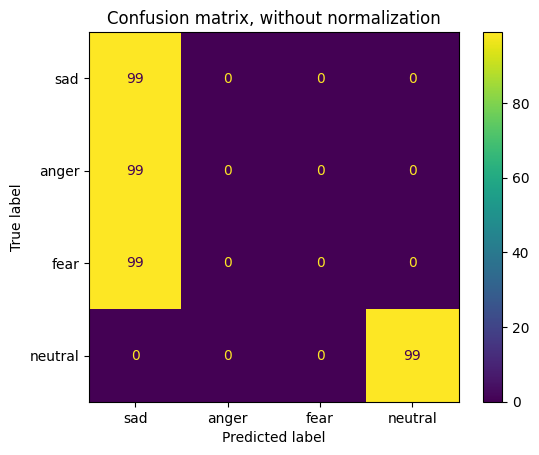

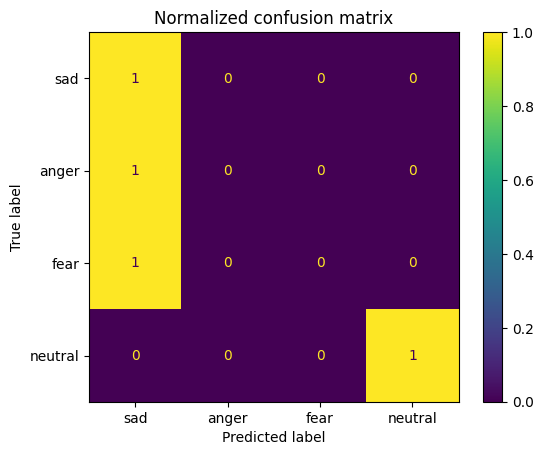

In [11]:
# Plot normalized and non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None), ("Normalized confusion matrix", "true")]

for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        lr,
        X_test,
        y_test,
        display_labels=target_names,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

### Random Forest

In [32]:
param_grid = {"n_estimators": [50, 100, 200, 300] }

rf = RandomForestClassifier(random_state=42)
grid_search_rf = GridSearchCV(rf, param_grid, cv=5, n_jobs=-1)
grid_search_rf.fit(X_train, y_train)
print(grid_search_rf.best_params_)

{'n_estimators': 300}


In [14]:
# Random Forest
rf = RandomForestClassifier(random_state=42, n_estimators=300)
cv_scores = cross_val_score(rf, X_train, y_train, cv=5)
rf = rf.fit(X_train, y_train)

print("Cross-validation scores:", cv_scores)
print("Mean accuracy:", np.mean(cv_scores))
print("Test set accuracy:", rf.score(X_test, y_test))

y_pred = rf.predict(X_test).astype(int)

target_names = ["sad", "anger", "fear", "neutral"]
print(classification_report(y_test, y_pred, target_names=target_names, zero_division = 0))

Cross-validation scores: [0.9789916  0.98319328 0.99159664 0.98312236 0.99578059]
Mean accuracy: 0.9865368932383081
Test set accuracy: 0.25
              precision    recall  f1-score   support

         sad       0.25      1.00      0.40        99
       anger       0.00      0.00      0.00        99
        fear       0.00      0.00      0.00        99
     neutral       0.00      0.00      0.00        99

    accuracy                           0.25       396
   macro avg       0.06      0.25      0.10       396
weighted avg       0.06      0.25      0.10       396



Confusion matrix, without normalization
[[99  0  0  0]
 [99  0  0  0]
 [99  0  0  0]
 [99  0  0  0]]
Normalized confusion matrix
[[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]]


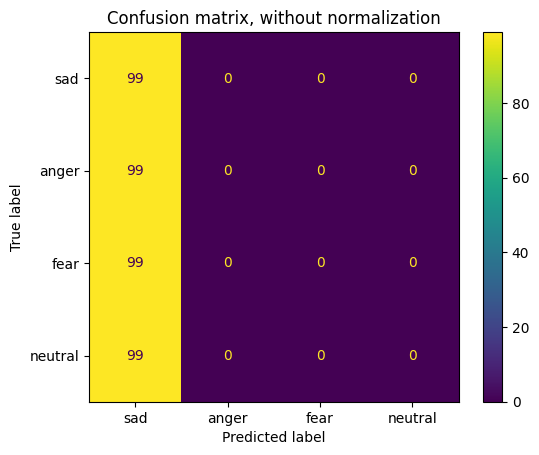

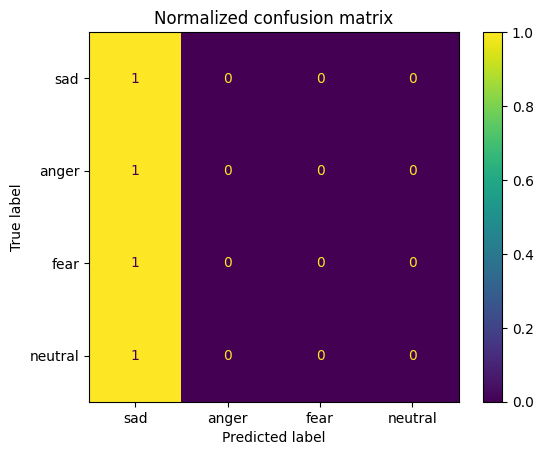

In [14]:
# Plot normalized and non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None), ("Normalized confusion matrix", "true")]

for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        rf,
        X_test,
        y_test,
        display_labels=target_names,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

### Multi-layer perceptron 

In [46]:
param_grid = {"hidden_layer_sizes": [(5,2)],
              "alpha": [0.0001, 0.001, 0.01],
              "learning_rate": ["constant", "adaptive"]}

mlp = MLPClassifier(random_state=42, max_iter=500000)
grid_search_mlp = GridSearchCV(mlp, param_grid, cv=5, n_jobs=-1)
grid_search_mlp.fit(X_train, y_train)
print(grid_search_mlp.best_params_)

{'alpha': 0.001, 'hidden_layer_sizes': (5, 2), 'learning_rate': 'constant'}


In [15]:
# Multi-layer perceptron 
mlp = MLPClassifier(random_state=42, solver="lbfgs", alpha=0.001, hidden_layer_sizes=(5,2), max_iter=50000)
cv_scores = cross_val_score(mlp, X_train, y_train, cv=5)
mlp = mlp.fit(X_train, y_train)

print("Cross-validation scores:", cv_scores)
print("Mean accuracy:", np.mean(cv_scores))
print("Test set accuracy:", mlp.score(X_test, y_test))

y_pred = mlp.predict(X_test).astype(int)

target_names = ["sad", "anger", "fear", "neutral"]
print(classification_report(y_test, y_pred, target_names=target_names, zero_division = 0))

Cross-validation scores: [0.76890756 0.95378151 0.96218487 0.70464135 0.96202532]
Mean accuracy: 0.8703081232492998
Test set accuracy: 0.2474747474747475
              precision    recall  f1-score   support

         sad       0.00      0.00      0.00        99
       anger       0.00      0.00      0.00        99
        fear       0.25      0.99      0.40        99
     neutral       0.00      0.00      0.00        99

    accuracy                           0.25       396
   macro avg       0.06      0.25      0.10       396
weighted avg       0.06      0.25      0.10       396



Confusion matrix, without normalization
[[ 0  0 99  0]
 [ 0  0 99  0]
 [ 1  0 98  0]
 [ 9  0 90  0]]
Normalized confusion matrix
[[0.         0.         1.         0.        ]
 [0.         0.         1.         0.        ]
 [0.01010101 0.         0.98989899 0.        ]
 [0.09090909 0.         0.90909091 0.        ]]


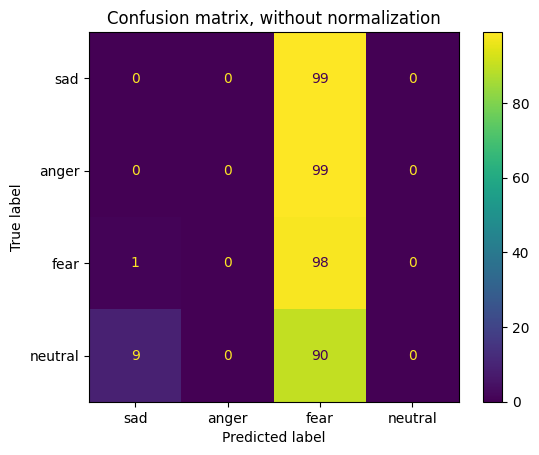

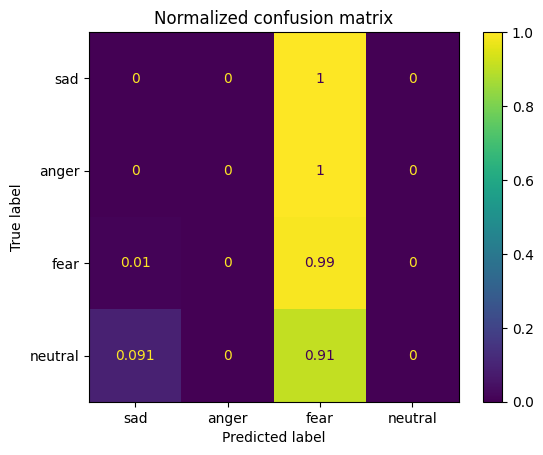

In [17]:
# Plot normalized and non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None), ("Normalized confusion matrix", "true")]

for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        mlp,
        X_test,
        y_test,
        display_labels=target_names,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

### Support Vector Machine

In [19]:
param_grid = {"svc__C": [0.1, 1, 10],
              "svc__kernel": ["linear", "rbf"],
              "svc__gamma": ["scale", "auto"]}

svm = make_pipeline(StandardScaler(), SVC(random_state=42))
grid_search_svm = GridSearchCV(svm, param_grid, cv=5, n_jobs=-1)
grid_search_svm.fit(X_train, y_train)
print(grid_search_svm.best_params_)

{'svc__C': 10, 'svc__gamma': 'scale', 'svc__kernel': 'rbf'}


In [16]:
# Support Vector Machine
svm = make_pipeline(StandardScaler(), SVC(random_state=42, gamma="scale", C=10, kernel="rbf"))
cv_scores = cross_val_score(svm, X_train, y_train, cv=5)
svm = svm.fit(X_train, y_train)

print("Cross-validation scores:", cv_scores)
print("Mean accuracy:", np.mean(cv_scores))
print("Test set accuracy:", svm.score(X_test, y_test))

y_pred = svm.predict(X_test).astype(int)

target_names = ["sad", "anger", "fear", "neutral"]
print(classification_report(y_test, y_pred, target_names=target_names, zero_division = 0))

Cross-validation scores: [0.99159664 0.9789916  0.99579832 0.99578059 1.        ]
Mean accuracy: 0.9924334290678297
Test set accuracy: 0.25
              precision    recall  f1-score   support

         sad       0.25      1.00      0.40        99
       anger       0.00      0.00      0.00        99
        fear       0.00      0.00      0.00        99
     neutral       0.00      0.00      0.00        99

    accuracy                           0.25       396
   macro avg       0.06      0.25      0.10       396
weighted avg       0.06      0.25      0.10       396



Confusion matrix, without normalization
[[99  0  0  0]
 [99  0  0  0]
 [99  0  0  0]
 [99  0  0  0]]
Normalized confusion matrix
[[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]]


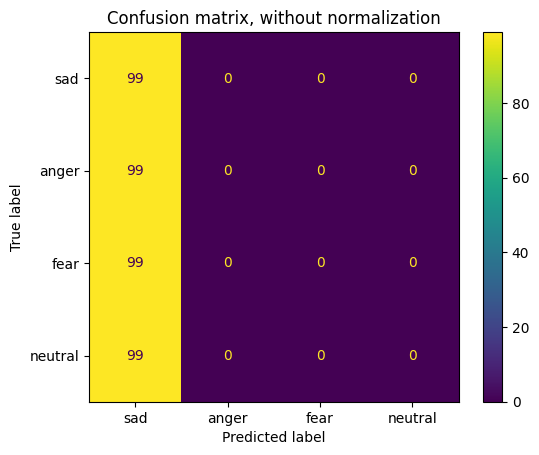

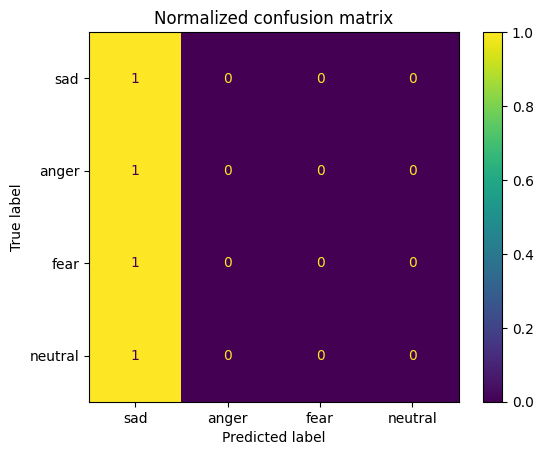

In [21]:
# Plot normalized and non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),("Normalized confusion matrix", "true")]

for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        svm,
        X_test,
        y_test,
        display_labels=target_names,
        normalize=normalize,
    )
    disp.ax_.set_title(title)
    print(title)
    print(disp.confusion_matrix)

plt.show()

### K-nearest neighbors

In [17]:
param_grid = {"n_neighbors": [1, 2, 3, 4, 5]}

knn = KNeighborsClassifier()
grid_search_lr = GridSearchCV(knn, param_grid, cv=5, n_jobs=-1)
grid_search_lr.fit(X_train, y_train)
print(grid_search_lr.best_params_)

{'n_neighbors': 1}


In [18]:
knn = KNeighborsClassifier(n_neighbors=1)
cv_scores = cross_val_score(knn, X_train, y_train, cv=5)
knn = knn.fit(X_train, y_train)

print("Cross-validation scores:", cv_scores)
print("Mean accuracy:", np.mean(cv_scores))
print("Test set accuracy:", knn.score(X_test, y_test))

y_pred = knn.predict(X_test).astype(int)

target_names = ["sad", "anger", "fear", "neutral"]
print(classification_report(y_test, y_pred, target_names=target_names, zero_division = 0))

Cross-validation scores: [0.99579832 0.9789916  0.99579832 0.99578059 0.99578059]
Mean accuracy: 0.9924298833457434
Test set accuracy: 0.25
              precision    recall  f1-score   support

         sad       0.25      1.00      0.40        99
       anger       0.00      0.00      0.00        99
        fear       0.00      0.00      0.00        99
     neutral       0.00      0.00      0.00        99

    accuracy                           0.25       396
   macro avg       0.06      0.25      0.10       396
weighted avg       0.06      0.25      0.10       396



Confusion matrix, without normalization
[[99  0  0  0]
 [99  0  0  0]
 [99  0  0  0]
 [99  0  0  0]]
Normalized confusion matrix
[[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]]


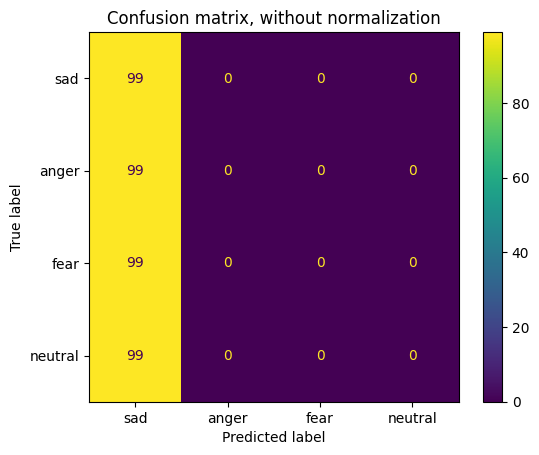

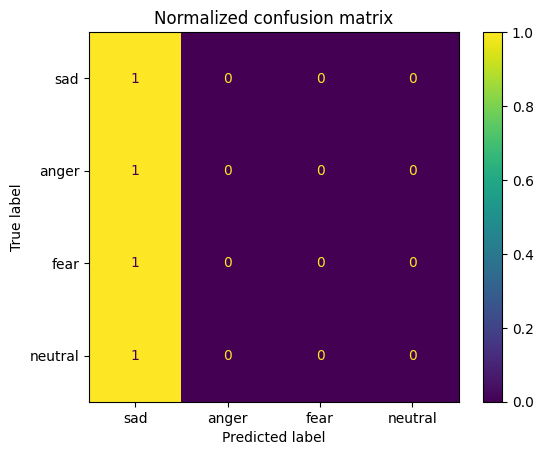

In [19]:
# Plot normalized and non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),("Normalized confusion matrix", "true")]

for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        knn,
        X_test,
        y_test,
        display_labels=target_names,
        normalize=normalize,
    )
    disp.ax_.set_title(title)
    print(title)
    print(disp.confusion_matrix)